In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#Importar dataset
dsalary=pd.read_csv('C:/Users/lupit/Downloads/SalaryData.csv')
dsalary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [21]:
dsalary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [22]:
#Extraccion de datos en las columnas x, y
x = dsalary.iloc[:,:-1].values
y = dsalary.iloc[:,1].values

In [23]:
#años de experiencia
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [24]:
#salario
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [25]:
#importar la libreria de division d3 datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

In [26]:
#Dividir los datos de entrenamiento y prueba, 80% entrenamiento, 20% prueba
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [27]:
#importar la libreria de regresion lineal
from sklearn.linear_model import LinearRegression

In [28]:
#construir el modelo de regresion lineal
reg = LinearRegression()

In [29]:
#Entrenamiento del modelo creado con los datos de entrenamiento
reg.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
LinearRegression()

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
#Utilizar los datos de prueba para validar que el algoritmo es optimo
y_pred = reg.predict(x_test)
x_pred = reg.predict(x_train)

Training Set


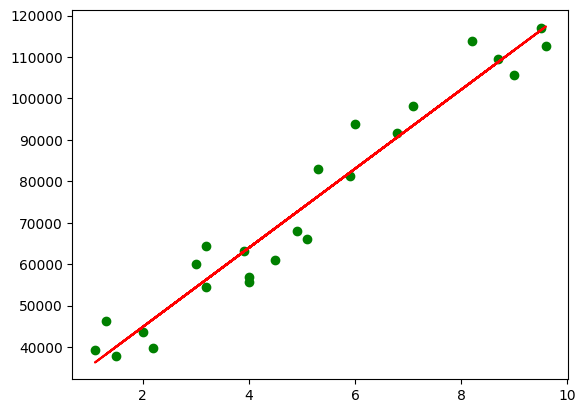

In [32]:
print("Training Set")
plt.scatter(x_train,y_train,color="green")
plt.plot(x_train,x_pred,color="red")
plt.show()

In [33]:
#Importar la libreria de metricas del modelo de prediccion
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
#Metricas de evaluacion
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [35]:
print("Metricas de evaluacion del modelo")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"MSE (Error Cuadratico Medio): {mse:.2f}")
print(f"RMSE (Raiz del Error Cuadratico Medio): {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

Metricas de evaluacion del modelo
MAE (Error Absoluto Medio): 3464.65
MSE (Error Cuadratico Medio): 17642076.99
RMSE (Raiz del Error Cuadratico Medio): 4200.25
R2 Score: 0.9803


In [39]:
#Prueba del modelo
print("Prueba del modelo entrenado")

#Valores de ejemplo para probar
valores_ejemplo = [1,3,5,8,12]

for valor in valores_ejemplo:
    prediccion = reg.predict([[valor]])[0]
    print(f"Si X = {valor:2d} Salario predicho: ${prediccion:,.2f}")

Prueba del modelo entrenado
Si X =  1 Salario predicho: $35,325.35
Si X =  3 Salario predicho: $54,404.61
Si X =  5 Salario predicho: $73,483.88
Si X =  8 Salario predicho: $102,102.77
Si X = 12 Salario predicho: $140,261.30


In [43]:
#importar la libreria
import joblib

#Guardar el modelo entrenado
joblib.dump(reg, 'modelo_salario.pkl')
print("Modelo entrenado cargado:" )

#funcion para cargar y usar el modelo posteriormente
def cargar_modelo_y_predecir(x_val, ruta_modelo='modelo_salario.pkl'):
    modelo = joblib.load(ruta_modelo)
    prediccion = modelo.predict([[x_val]])[0]
    return prediccion

#probar la funcion de carga 
print("\n Probando modelo cargado")
x_prueba = 13
pred_cargado = cargar_modelo_y_predecir(x_prueba)
print(f"X = {x_prueba} Prediccion: ${pred_cargado:,.2f}")

Modelo entrenado cargado:

 Probando modelo cargado
X = 13 Prediccion: $149,800.93
